In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# ---------------------------
# 1) Load dataset
# -----------------------------
df = pd.read_csv("TeloCustomer.csv")
print("Data loaded. Shape:", df.shape)


Data loaded. Shape: (7043, 21)


In [7]:
# -----------------------------
# 2) Data Preparation
# -----------------------------
# Drop ID column
df.drop("customerID", axis=1, inplace=True)

In [8]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18188\1566558627.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [9]:
# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [10]:
# One-hot encode categorical features
categorical = df.select_dtypes(include=["object"]).columns.tolist()
df = pd.get_dummies(df, columns=categorical, drop_first=True)

print(" Data preprocessed. Shape after encoding:", df.shape)

 Data preprocessed. Shape after encoding: (7043, 31)


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
numerical = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
print(" Feature scaling applied to numerical columns.")

 Feature scaling applied to numerical columns.


In [12]:
# -----------------------------
# 3) Train-Test Split
# -----------------------------
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Data split. Train size:", X_train.shape, "Test size:", X_test.shape)


 Data split. Train size: (5634, 30) Test size: (1409, 30)


In [13]:
# -----------------------------
# 4) Train Model
# -----------------------------

lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
print(" Logistic Regression model training complete.")

 Logistic Regression model training complete.


In [14]:
# -----------------------------
# 5) Evaluate Model
# -----------------------------

y_pred = lr_clf.predict(X_test)
y_prob = lr_clf.predict_proba(X_test)[:, 1]

print("\n Logistic Regression Model Evaluation Results:")
print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall   :", round(recall_score(y_test, y_pred), 3))
print("F1 Score :", round(f1_score(y_test, y_pred), 3))
print("AUC-ROC  :", round(roc_auc_score(y_test, y_prob), 3))


 Logistic Regression Model Evaluation Results:
Accuracy : 0.805
Precision: 0.655
Recall   : 0.559
F1 Score : 0.603
AUC-ROC  : 0.842


In [15]:
# -----------------------------
# 6) Feature Importances

# Logistic Regression Feature Importances
import numpy as np
feature_importance = np.abs(lr_clf.coef_[0])
features = X.columns
top_indices = np.argsort(feature_importance)[-10:][::-1]
top_features = features[top_indices]
top_importances = feature_importance[top_indices]
print("\nTop 10 Features Driving Churn:")
for feat, imp in zip(top_features, top_importances):
    print(f"{feat}: {imp:.4f}")



Top 10 Features Driving Churn:
Contract_Two year: 1.3395
tenure: 1.2354
InternetService_Fiber optic: 1.1931
Contract_One year: 0.6900
TotalCharges: 0.5067
PhoneService_Yes: 0.4975
MonthlyCharges: 0.4773
StreamingMovies_Yes: 0.3805
StreamingTV_Yes: 0.3802
PaymentMethod_Electronic check: 0.3799


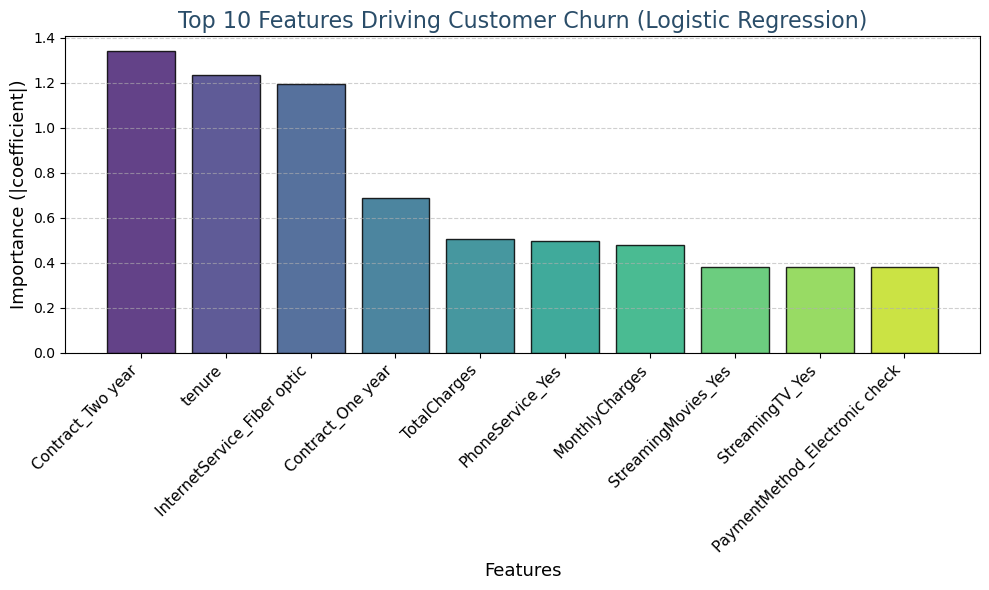

In [16]:
# Plot top features
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(top_features))
bars = plt.bar(top_features, top_importances, color=colors, edgecolor='black')
plt.title("Top 10 Features Driving Customer Churn (Logistic Regression)", fontsize=16, color='#2a4d69')
plt.xlabel("Features", fontsize=13)
plt.ylabel("Importance (|coefficient|)", fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars:
    bar.set_alpha(0.85)
plt.tight_layout()
plt.show()

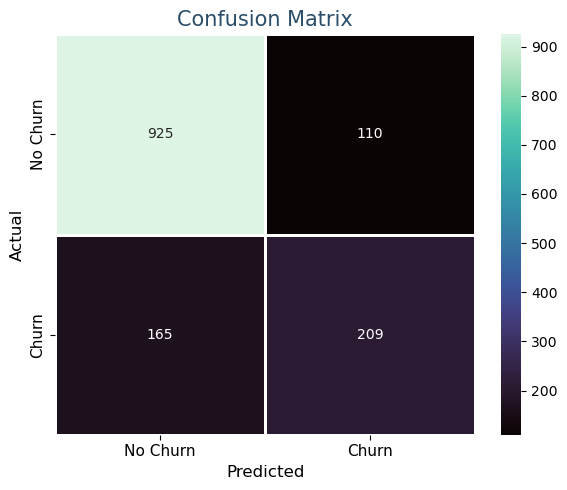

In [17]:
# -----------------------------
# 7) Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="mako", linewidths=2, linecolor='white', cbar=True,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix", fontsize=15, color='#2a4d69')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

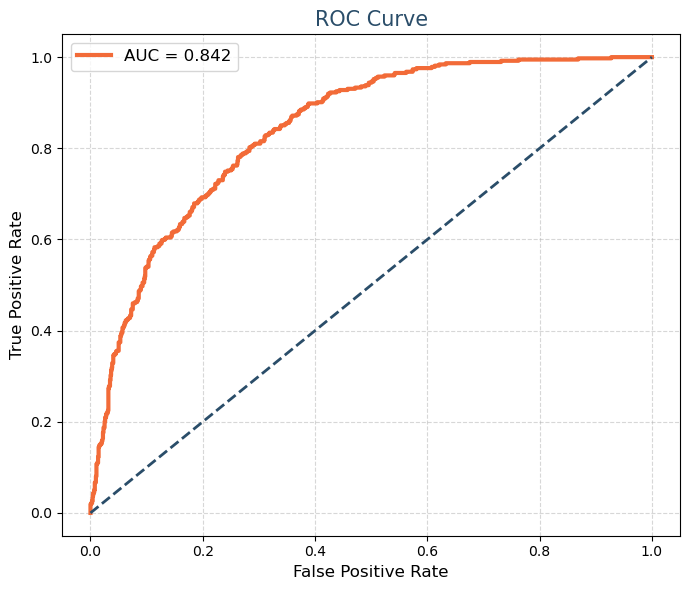

In [18]:
# -----------------------------
# 8) ROC Curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='#f26b38', linewidth=3, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="#2a4d69", linewidth=2)
plt.title("ROC Curve", fontsize=15, color='#2a4d69')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()